In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
diabetes = pd.read_csv('/root/data/diabetes.csv')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes.columns = map(str.upper, diabetes.columns)

In [5]:
diabetes.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
PREGNANCIES                 768 non-null int64
GLUCOSE                     768 non-null int64
BLOODPRESSURE               768 non-null int64
SKINTHICKNESS               768 non-null int64
INSULIN                     768 non-null int64
BMI                         768 non-null float64
DIABETESPEDIGREEFUNCTION    768 non-null float64
AGE                         768 non-null int64
OUTCOME                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.cluster import KMeans

In [10]:
from sklearn import preprocessing

In [11]:
cluster = diabetes[['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN','BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME']]

In [12]:
# Standardize our variables, mean=0, sd=1

In [13]:
cluster_s = cluster.copy()

In [14]:
cluster_s['PREGNANCIES'] = preprocessing.scale(cluster_s['PREGNANCIES'].astype('float64'))

In [15]:
cluster_s['GLUCOSE'] = preprocessing.scale(cluster_s['GLUCOSE'].astype('float64'))

In [16]:
cluster_s['BLOODPRESSURE'] = preprocessing.scale(cluster_s['BLOODPRESSURE'].astype('float64'))

In [17]:
cluster_s['SKINTHICKNESS'] = preprocessing.scale(cluster_s['SKINTHICKNESS'].astype('float64'))

In [18]:
cluster_s['INSULIN'] = preprocessing.scale(cluster_s['INSULIN'].astype('float64'))

In [19]:
cluster_s['BMI'] = preprocessing.scale(cluster_s['BMI'].astype('float64'))

In [20]:
cluster_s['DIABETESPEDIGREEFUNCTION'] = preprocessing.scale(cluster_s['DIABETESPEDIGREEFUNCTION'].astype('float64'))

In [21]:
cluster_s['AGE'] = preprocessing.scale(cluster_s['AGE'].astype('float64'))

In [22]:
cluster_train, cluster_test = train_test_split(cluster_s, test_size=0.3,random_state=222)

In [23]:
print(cluster_train.shape, cluster_test.shape)

(537, 9) (231, 9)


In [24]:
cluster = range(1,9)

In [25]:
mean_dist = []

In [26]:
from scipy.spatial.distance import cdist

In [27]:
for k in cluster:
    model = KMeans(n_clusters=k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train,model.cluster_centers_,'euclidean'),axis=1))/cluster_train.shape[0])


In [28]:
print(cluster_train.shape)

(537, 9)


In [29]:
for k in cluster:
    model=  KMeans(n_clusters=k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train,model.cluster_centers_,'euclidean'),axis=1))/cluster_train.shape[0])
    
    
    
    

In [30]:
# Lets plot the elbow plot

ValueError: x and y must have same first dimension, but have shapes (8,) and (16,)

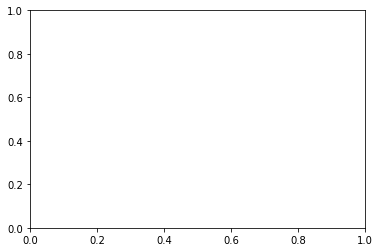

In [31]:
plt.plot(cluster, mean_dist)


In [ ]:
plt.plot(cluster,mean_dist)
plt.xlabel('number of clusters')
plt.ylabel('Ave.Distance')
plt.title('Elbow method for our k  value')
